In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from arch.unitroot import PhillipsPerron
from MultiCompaniesEDA import MultiCompaniesEDA
from statsmodels.tsa.seasonal import seasonal_decompose
from SingleCompanyEDA import SingleCompanyEDA

In [14]:
# Customize this root to your own path
root = "E:/deep-learning-wellington-od-develop/deep-learning-wellington-od-develop/data/"

In [15]:
credit = pd.read_csv(root+"data4columbia_credit.csv")

In [16]:
credit['trans_date'] = pd.to_datetime(credit['trans_date'])

In [17]:
credit

,Unnamed: 0,trans_date,data
0,ef1bcca724f3,2016-01-01,266648.924500
1,ef1bcca724f3,2016-01-02,330109.961300
2,ef1bcca724f3,2016-01-03,248299.827200
3,ef1bcca724f3,2016-01-04,146428.339600
4,ef1bcca724f3,2016-01-05,146854.815500
...,...,...,...
116654,e2415cb7f63d,2022-11-05,1149.371612
116655,e2415cb7f63d,2022-11-06,890.458833
116656,e2415cb7f63d,2022-11-07,1233.454763
116657,e2415cb7f63d,2022-11-08,2478.464933


In [18]:
credit['Unnamed: 0'].nunique()

48

In [19]:
company_list = credit["Unnamed: 0"].unique()[:4]

# Customize the size of your figure

In [21]:
plt.rcParams['figure.figsize'] = (20, 7)

# Demo of EDA of a single company

In [22]:
company0 = SingleCompanyEDA(company_list[1], credit)

e:\deep-learning-wellington-od-develop\deep-learning-wellington-od-develop\data\SingleCompanyEDA.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.dropna(inplace=True)


### 1. Plot the original time series

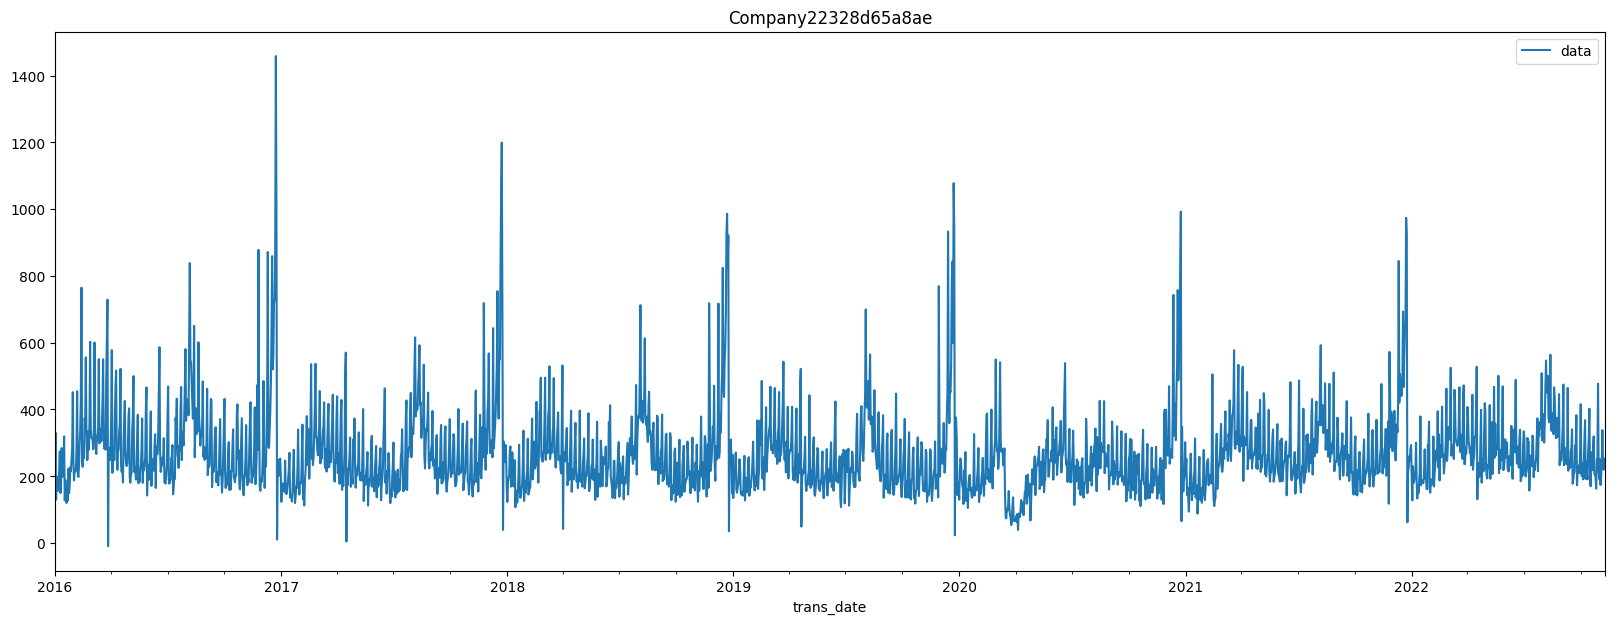

In [23]:
company0.plot_original_time_series()

### 2. Plot the ACF of the original time series
If the line exceeds the light blue region we can conclude that there is autocorrelation between data. That is, there exists time dependency in the data.

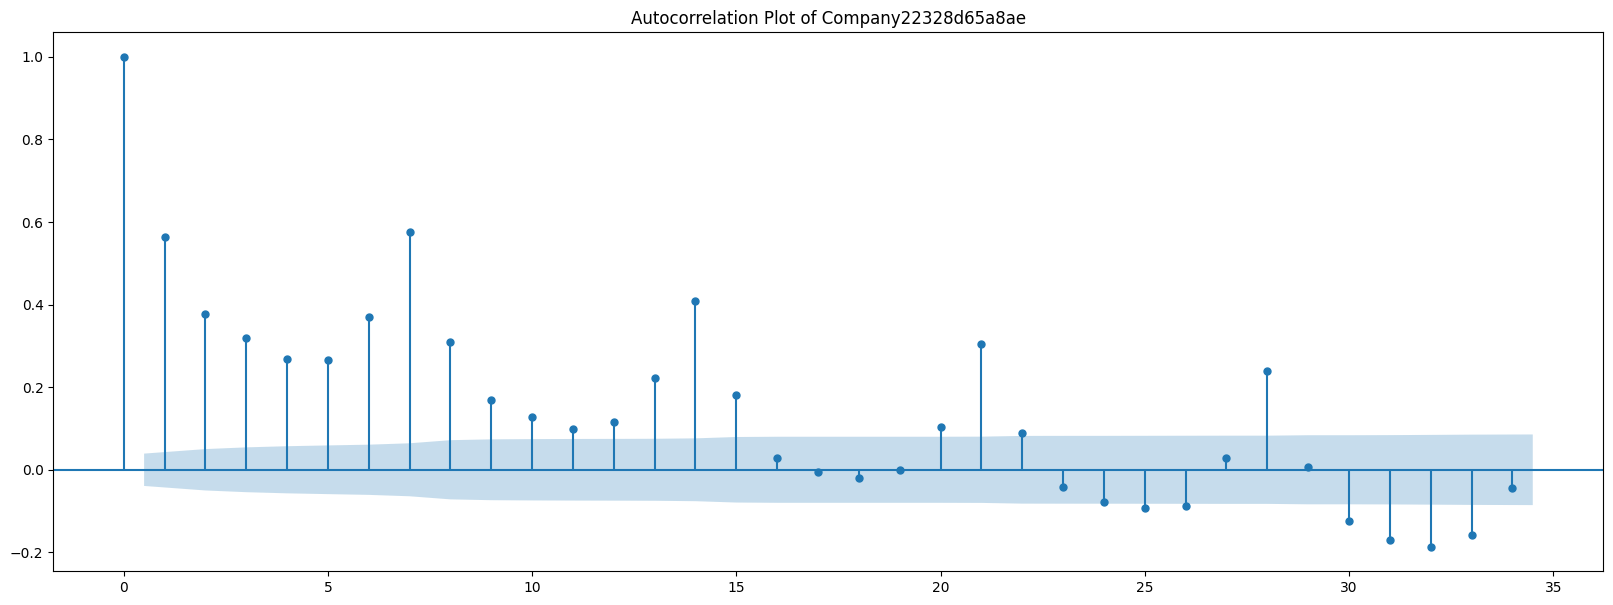

In [323]:
company0.plot_acf()

### 3. Plot the PACF of the original time series
If the line exceeds the light blue region we can conclude that there is partial correlation between data. We can also observe that for acf and pacf, we can observe there exists a repeating pattern. The length of the period is 7. The data may have a weekly pattern.

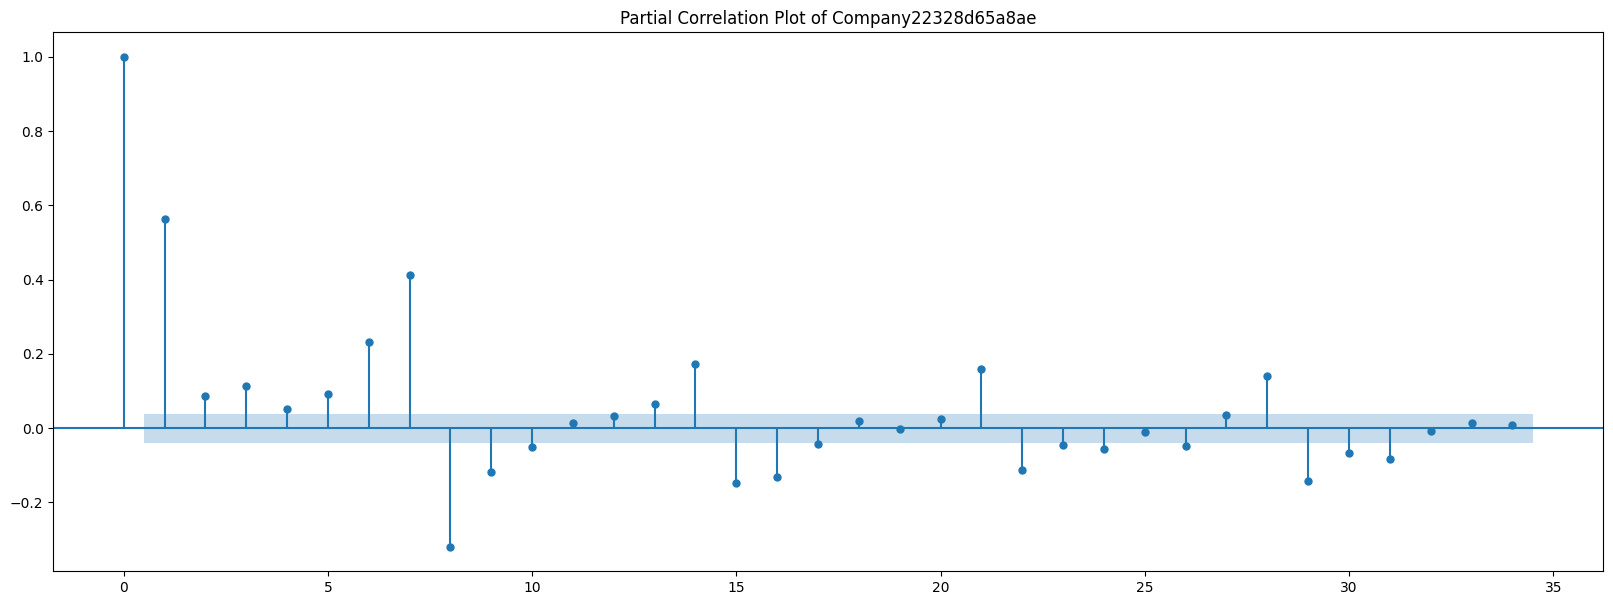

In [324]:
company0.plot_pacf()

### 4. Conduct STL decompostion on the original time series

Since orginally, we observe there is a weekly pattern, we set the period to be 7 for the seaonal part.

In [363]:
# the parameter 7 is the length of your period for your seasonal part.
company0.stlDecompositon(7)

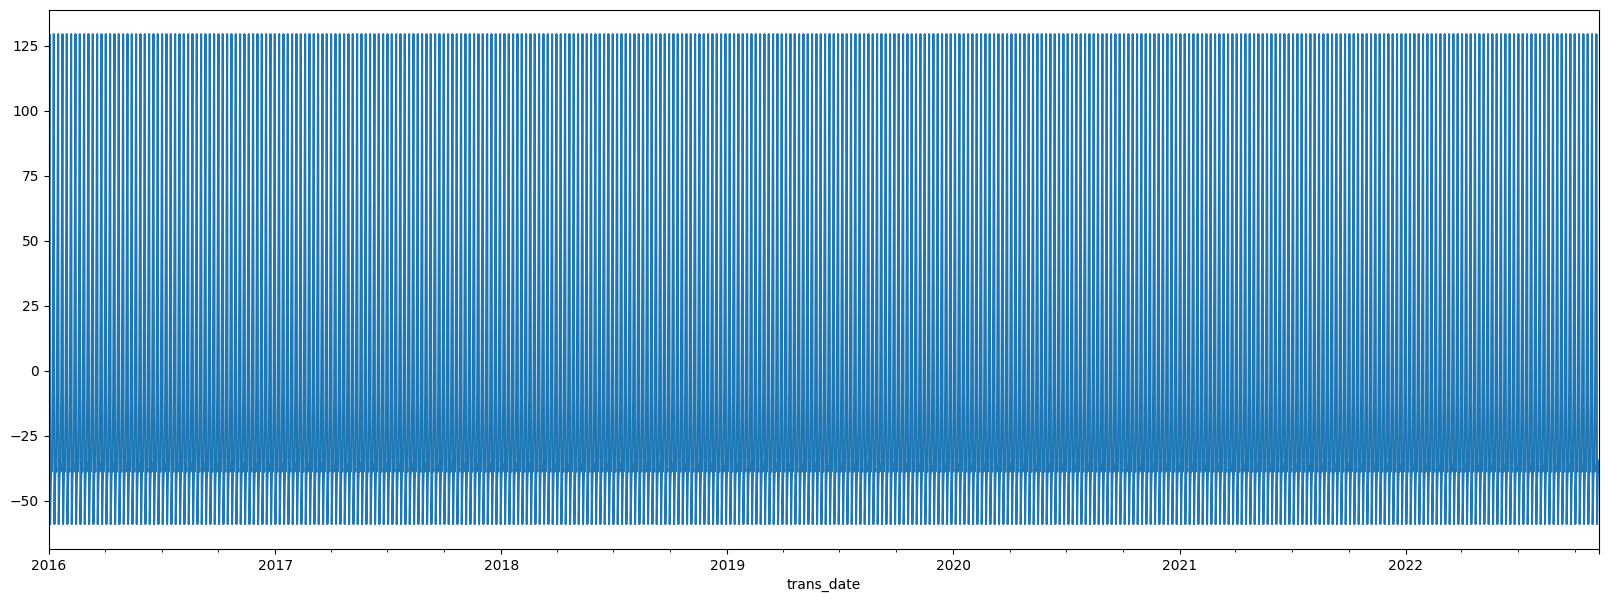

In [364]:
company0.plot_seasonal_part()

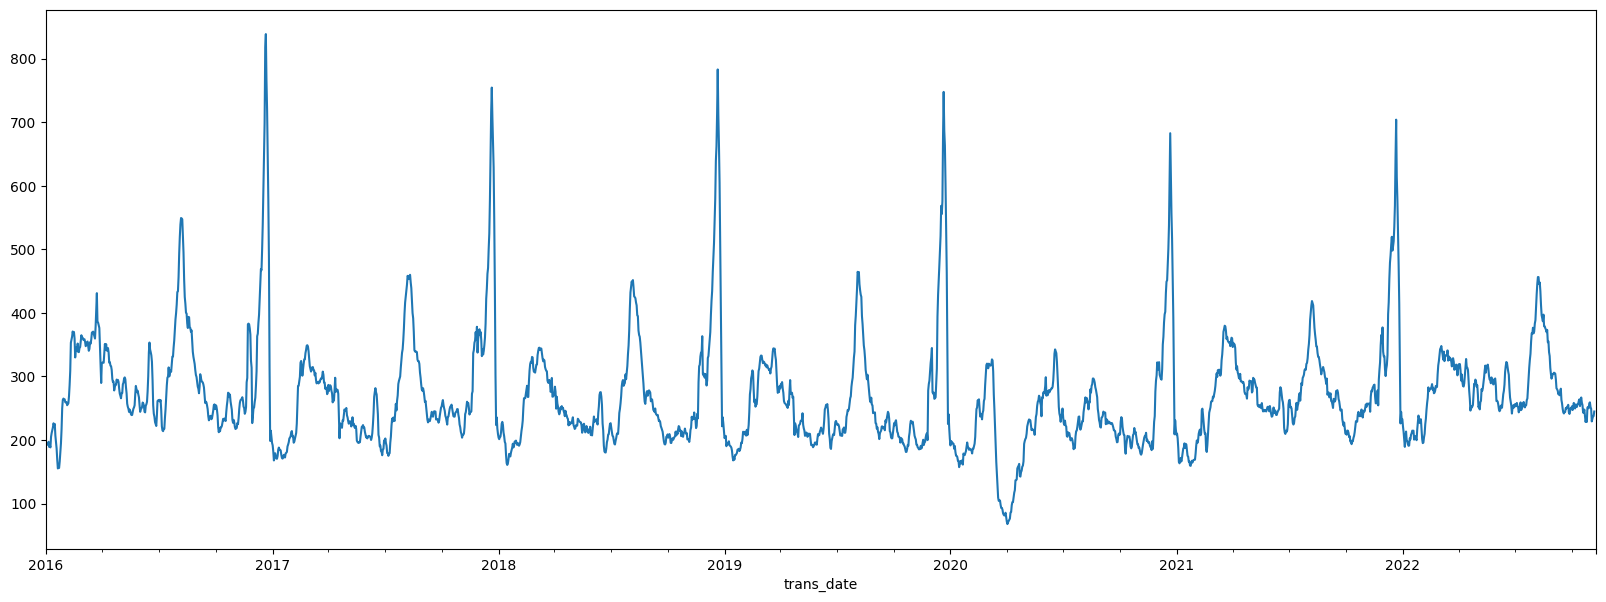

In [365]:
company0.plot_trend_part()

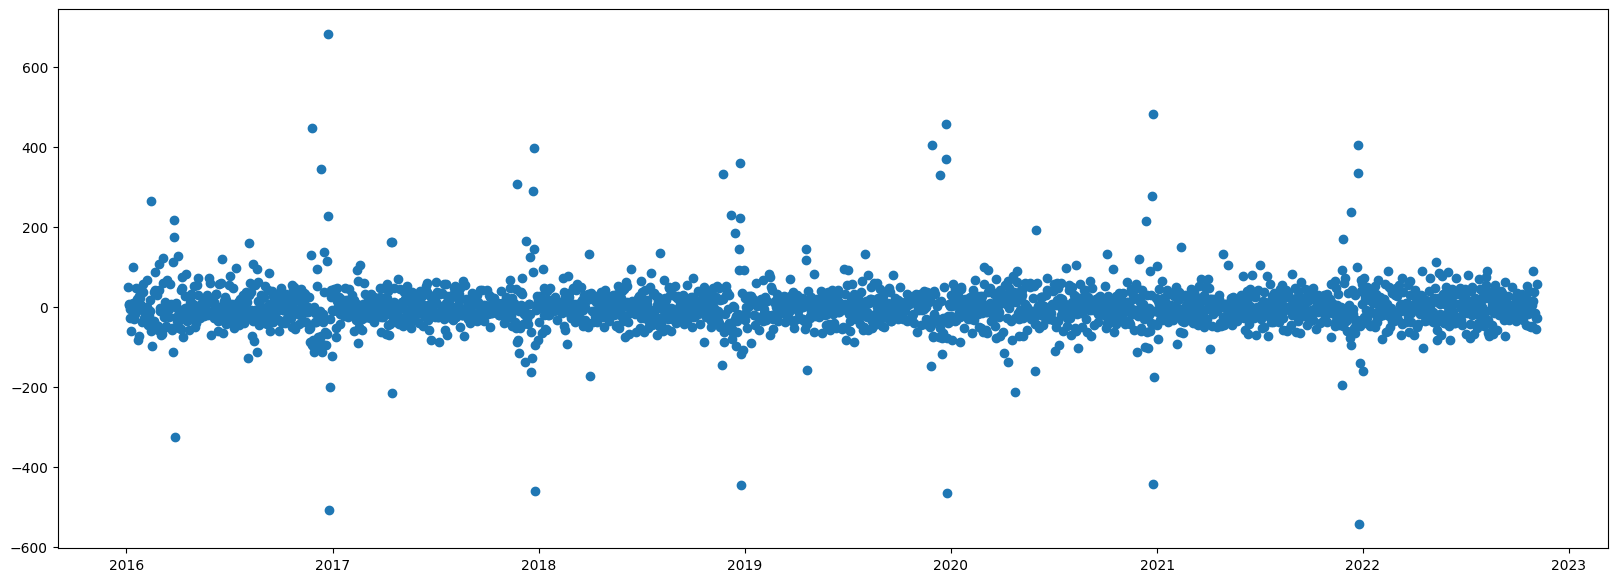

In [328]:
company0.plot_residual_part()

Based on the plot of the seasonal part, you can adjust your length of period for the seasonal part.

In [329]:
company0.stlDecompositon(365)

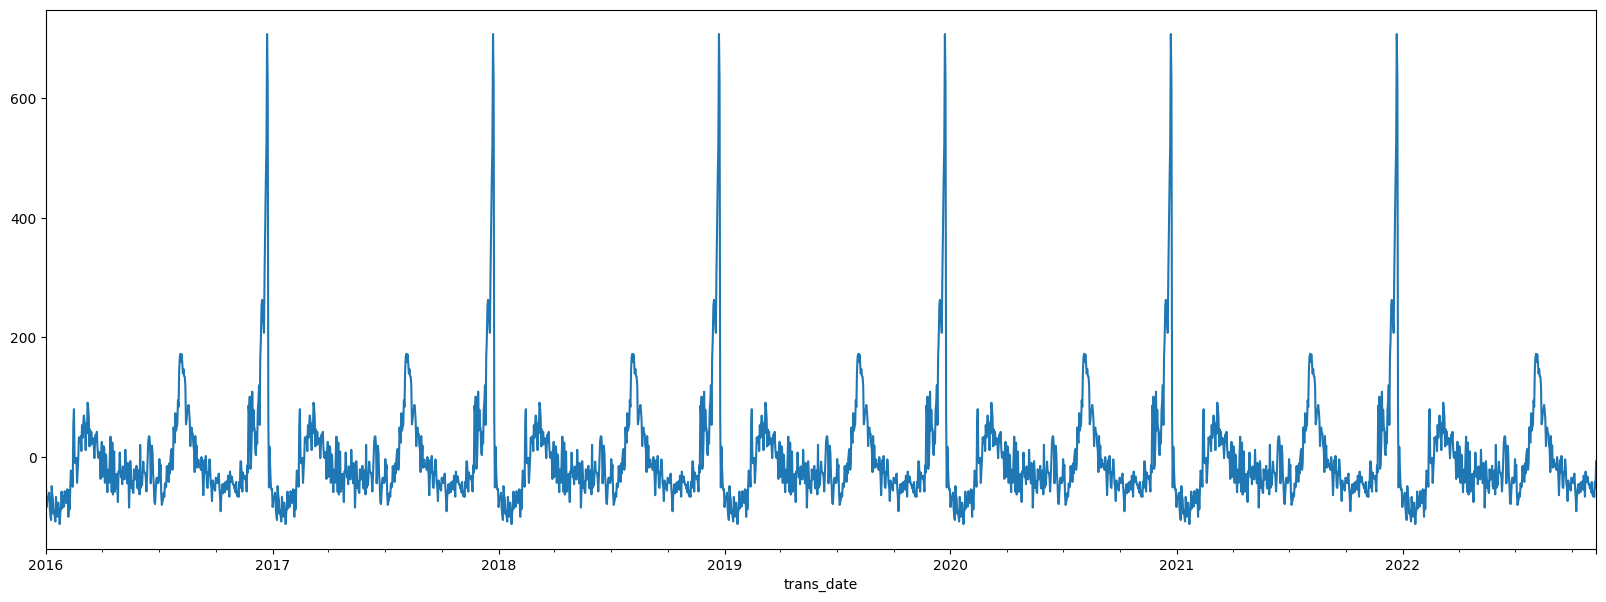

In [330]:
company0.plot_seasonal_part()

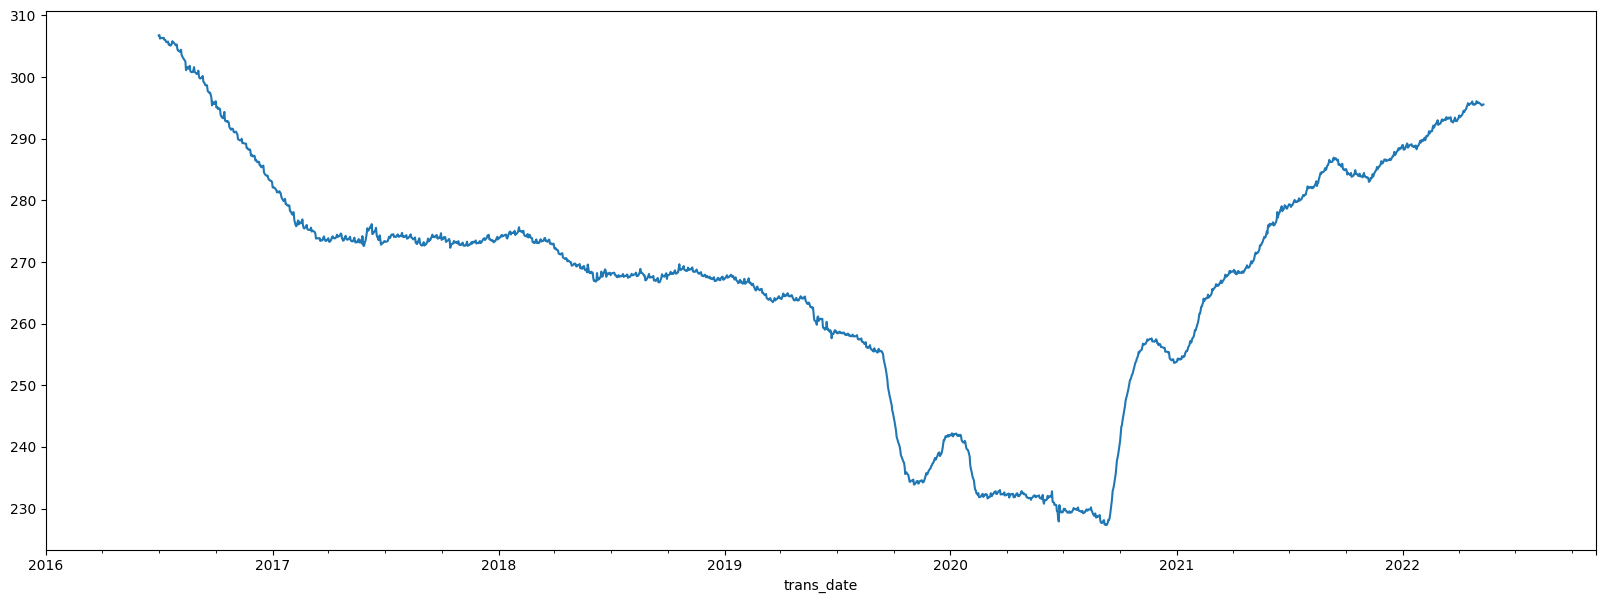

In [331]:
company0.plot_trend_part()

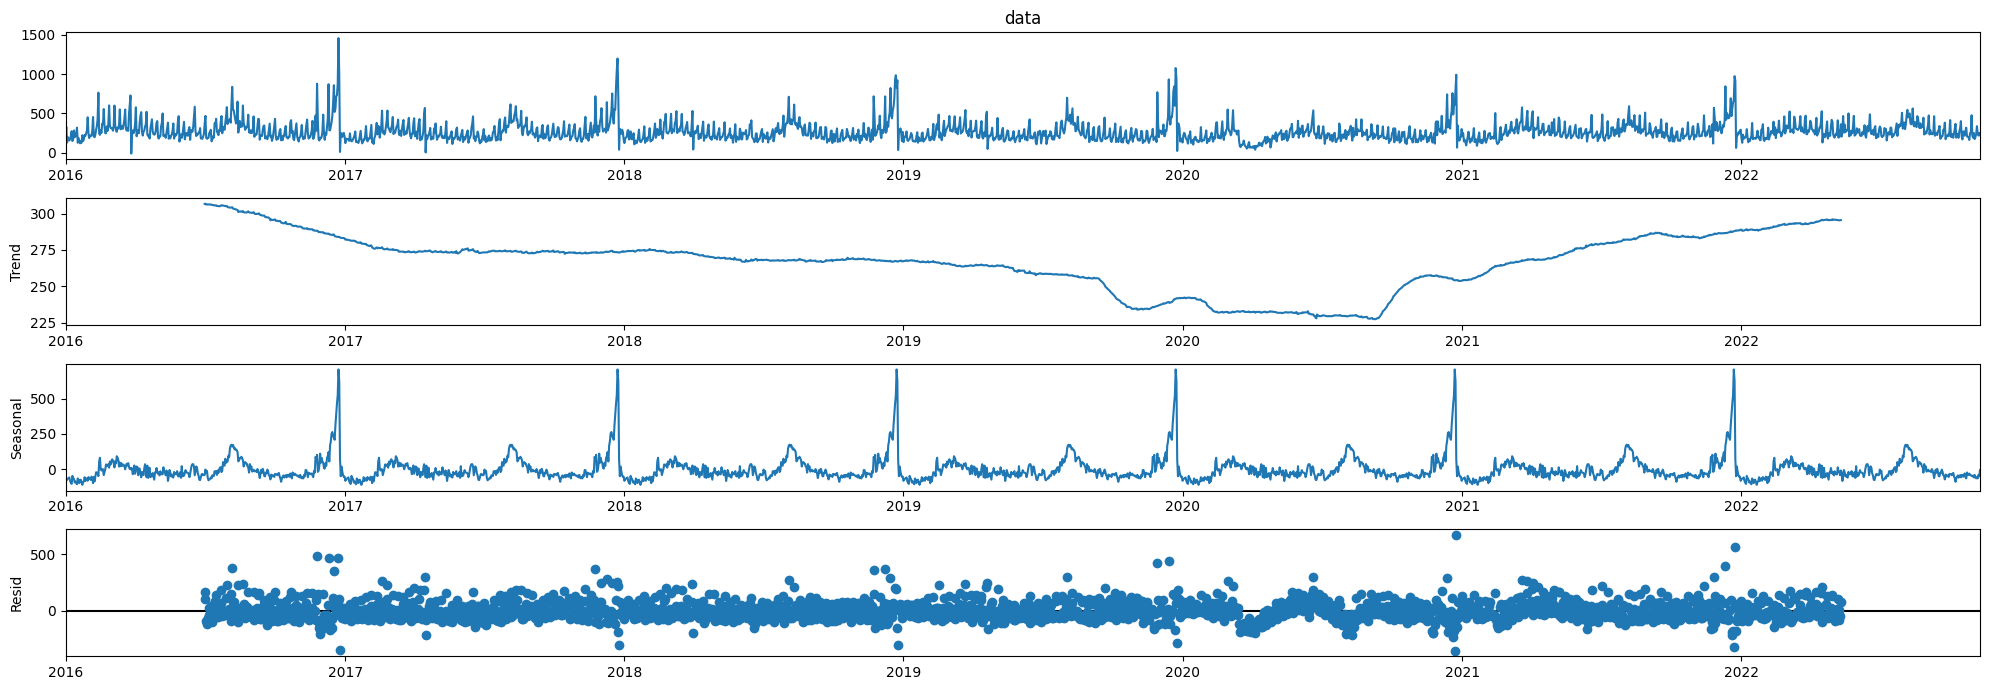

In [332]:
company0.plot_stl()

### 5. Conduct Phillips Perron test on the given data
You can conduct the pp-test on the original time series or its first order difference time series data. The null hypothesis is that the time series is nonstationary. The alternative hypothesis is that the time series is weakly stationary.
If the p-value is less than 0.05, you can conclude that the time series is weakly stationary, which would ensure us good statistical properties.

In [318]:
# If you want to conduct pp-test on the original time series, pass company0.data['data] to the parameter
# If you want to conduct pp-test on the first order differenced time series, pass company0.diff to the parameter
company0.pp_test(company0.diff)

     Phillips-Perron Test (Z-tau)    
Test Statistic               -142.776
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [338]:
company0.pp_test(company0.data['data'])

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.590
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### 6. Plot the boxplot of the data
You can plot the boxplot of the original time series of the first order difference time series

d:\Python3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


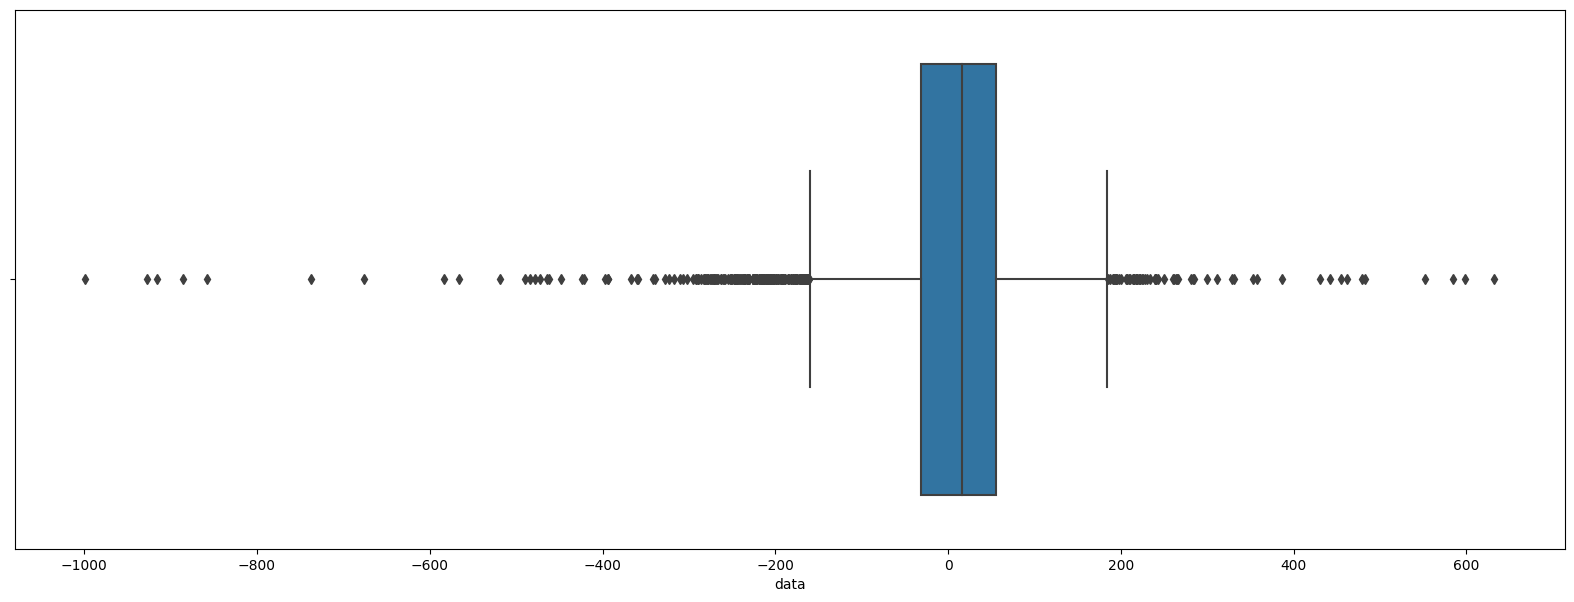

In [333]:
# If you want to plot the boxplot of the original time series, pass company0.data['data'] to the parameter
# If you want to plot the boxplot of the first order differenced time series, pass company0.diff to the parameter
company0.boxplot(company0.diff)

### 7. Plot the histogram of the data
You can plot the historgam of the orginal time series or the first order differenced time series
The data points which are three standard deviations away from the mean are marked as red

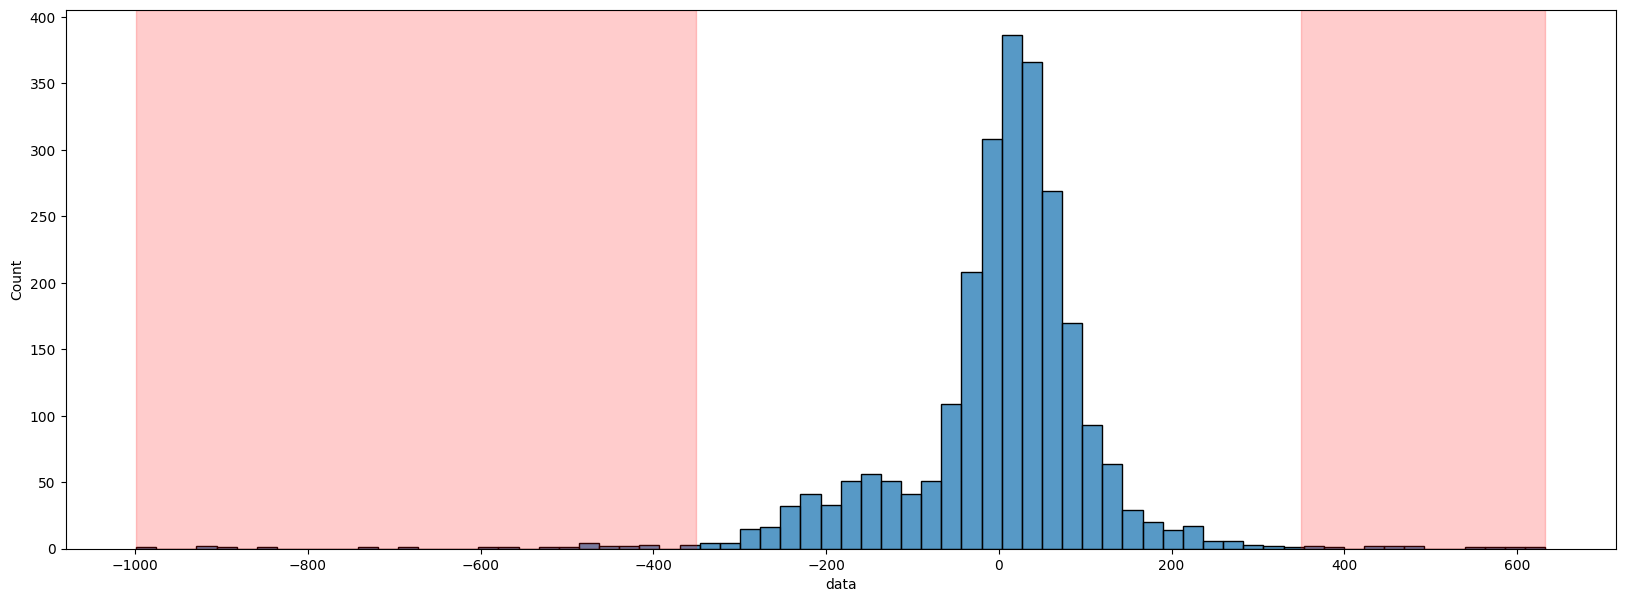

In [334]:
# If you want to plot the histogram of the original time series, pass company0.data['data'] to the parameter
# If you want to plot the histogram of the first order differenced time series, pass company0.diff to the parameter
company0.hist(company0.diff)

# Demo of EDA for multimple companies

In [24]:
companies = MultiCompaniesEDA(company_list, credit)

e:\deep-learning-wellington-od-develop\deep-learning-wellington-od-develop\data\MultiCompaniesEDA.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


### 1. Plot the original data

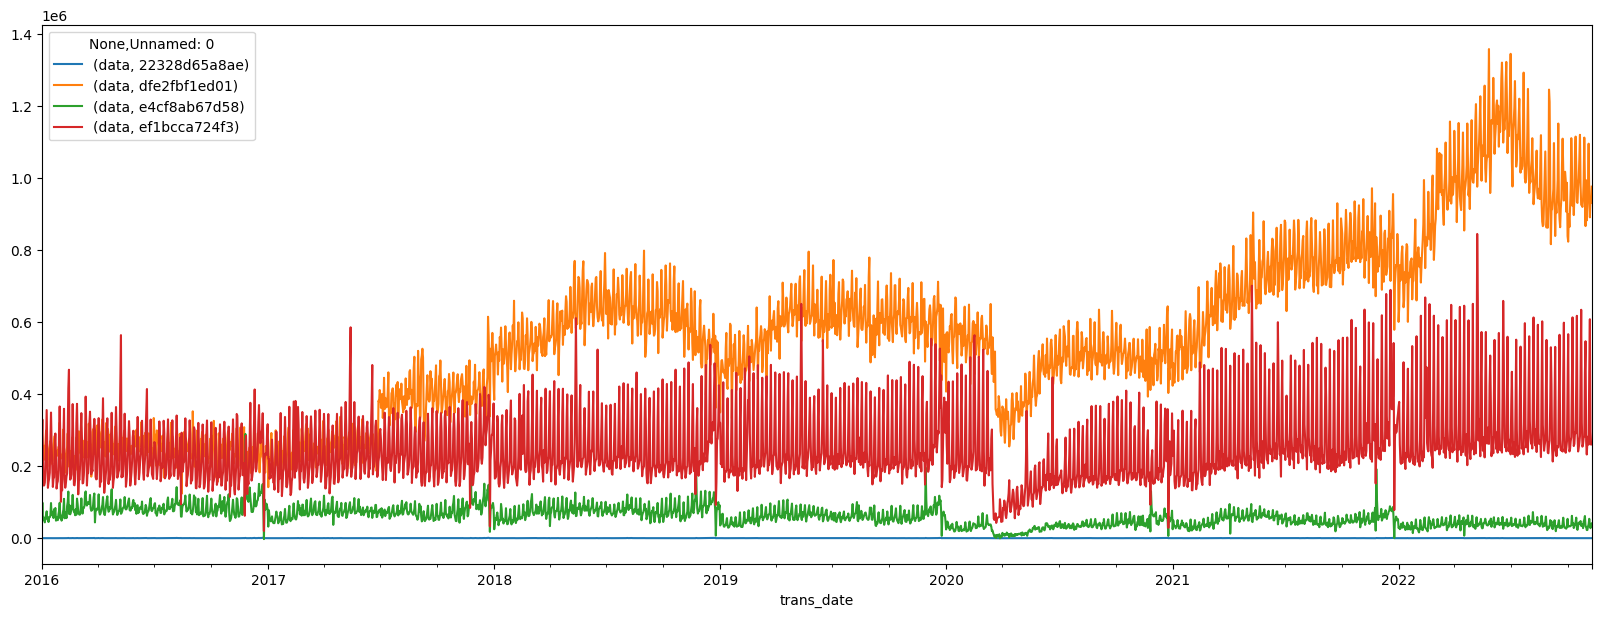

In [25]:
# If you want to plot the original time series, pass companies.companyseries to the parameter
# If you want to plot the first order differenced time series, pass companies.companies_d1 to the parameter
companies.plot_original_time_series(companies.companyseries)

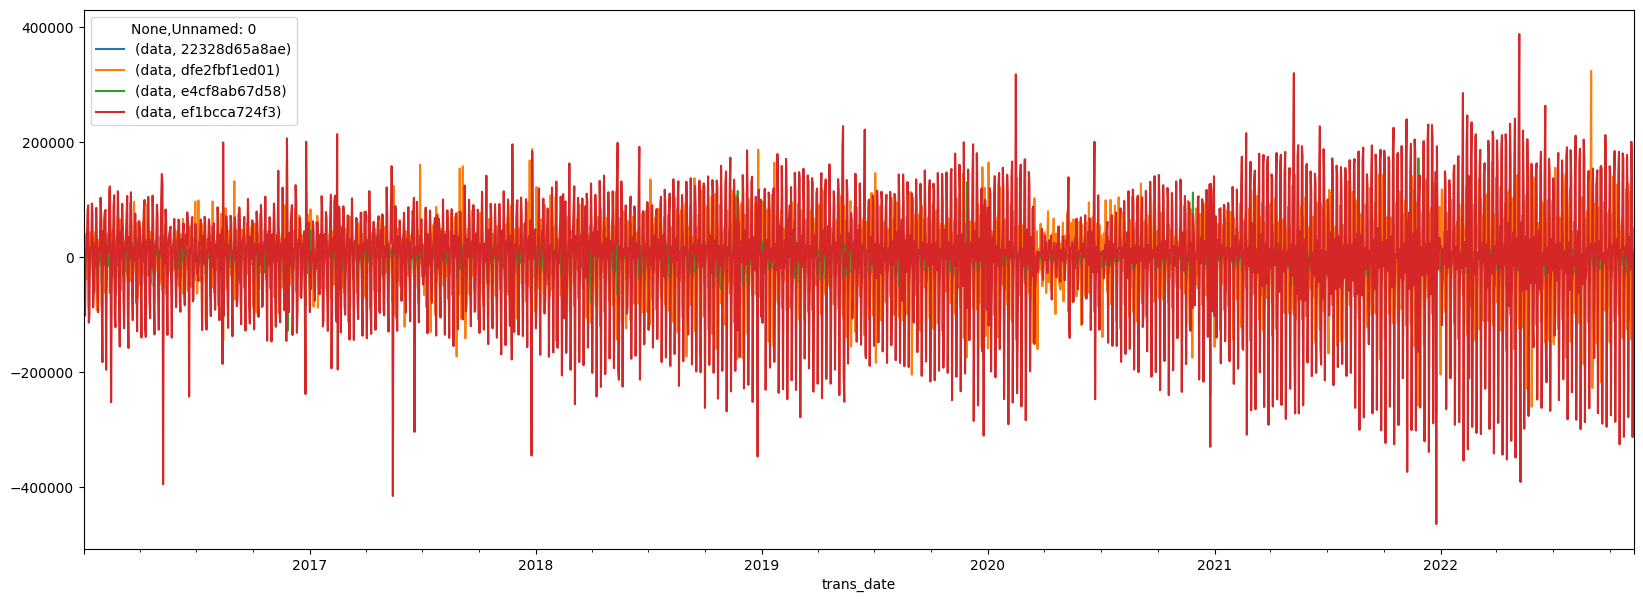

In [352]:
companies.plot_original_time_series(companies.companies_d1)

### 2. Plot the autocorrelation of different companies
If the line exceeds the grey dashed line, you can conclude that there exists correlation among these companies

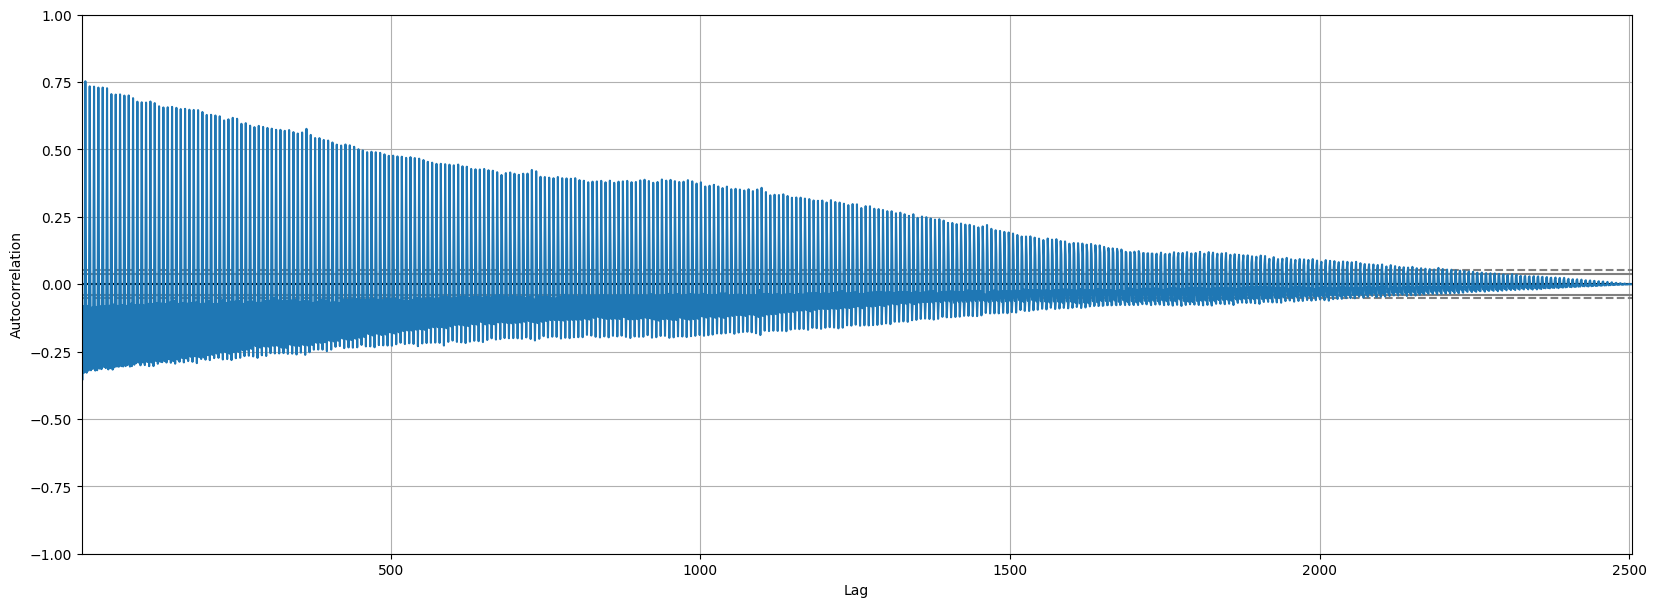

In [353]:
# If you want to plot the autocorrelation of the original time series, pass companies.companyseries to the parameter
# If you want to plot the autocorrelation of the first order differenced time series, pass companies.companies_d1 to the parameter
companies.plot_autocorrelation_among_companies(companies.companies_d1)

### 3. Plot the correlation matrix

In [358]:
# If you want to plot the correlation matrix of the original time series, pass companies.companyseries to the parameter
# If you want to plot the correlation matrix of the first order differenced time series, pass companies.companies_d1 to the parameter
companies.plot_correlation_matrix(companies.companies_d1)